In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [3]:
gdp_df.shape

(8219, 4)

8219 rows, 4 columns
data types for each column are 


In [5]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [6]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [7]:
gdp_df = gdp_df.rename(columns = {'Country or Area': 'Country', 'Year': 'Year', 'Value': 'gdp_per_capita'})

In [8]:
country_year = gdp_df.groupby('Country')['Year'].nunique()
year_range = gdp_df['Year'].unique()
country_all_years = country_year[country_year == len(year_range)]
num_countries_with = len(country_all_years)
num_countries_with
country_all_years

Country
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Algeria                        34
Andorra                        34
                               ..
Vanuatu                        34
Viet Nam                       34
World                          34
Zambia                         34
Zimbabwe                       34
Name: Year, Length: 228, dtype: int64

In [9]:
country_missing = country_year[country_year < len(year_range)]
country_missing

Country
Afghanistan                  24
Bhutan                       33
Cayman Islands               18
CuraÃ§ao                     24
Djibouti                     11
Faroe Islands                16
Greenland                    32
Kosovo                       16
Lebanon                      33
Montenegro                   27
San Marino                   26
Serbia                       29
Sint Maarten (Dutch part)    15
Somalia                      33
Syrian Arab Republic         33
Tonga                        33
Turks and Caicos Islands     13
Virgin Islands               21
West Bank and Gaza           30
Name: Year, dtype: int64

In [10]:
gdp_df

,Country,Year,gdp_per_capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [11]:
observations_year = gdp_df.groupby('Year').size()

rising trends of observations till the final year

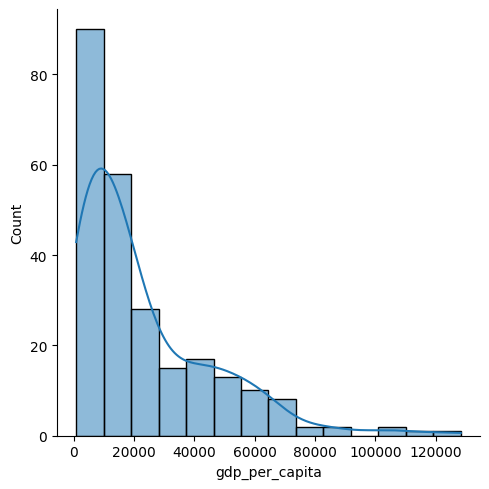

In [13]:
df_2020 = gdp_df[gdp_df['Year'] == 2020]
sns.displot( data=df_2020["gdp_per_capita"], kde=True )

<Axes: xlabel='gdp_per_capita', ylabel='Density'>

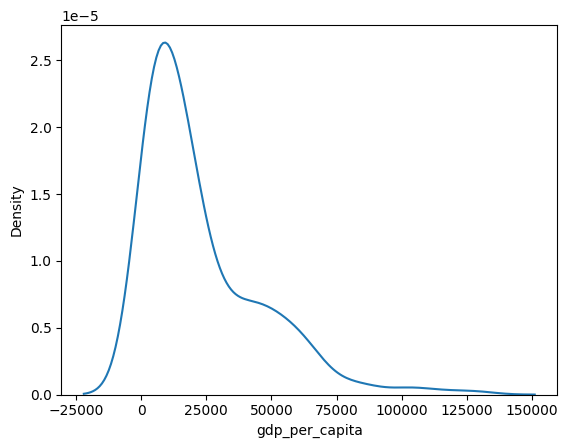

In [14]:
sns.kdeplot(df_2020['gdp_per_capita'])

Histogram and Density plot both provide ways of finding distribution of variable.

In [16]:
df_2020

,Country,Year,gdp_per_capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748
...,...,...,...
8068,Virgin Islands,2020,45055.782930
8090,West Bank and Gaza,2020,5423.682547
8120,World,2020,18600.986362
8154,Zambia,2020,3391.595412


<Axes: xlabel='gdp_per_capita', ylabel='Country'>

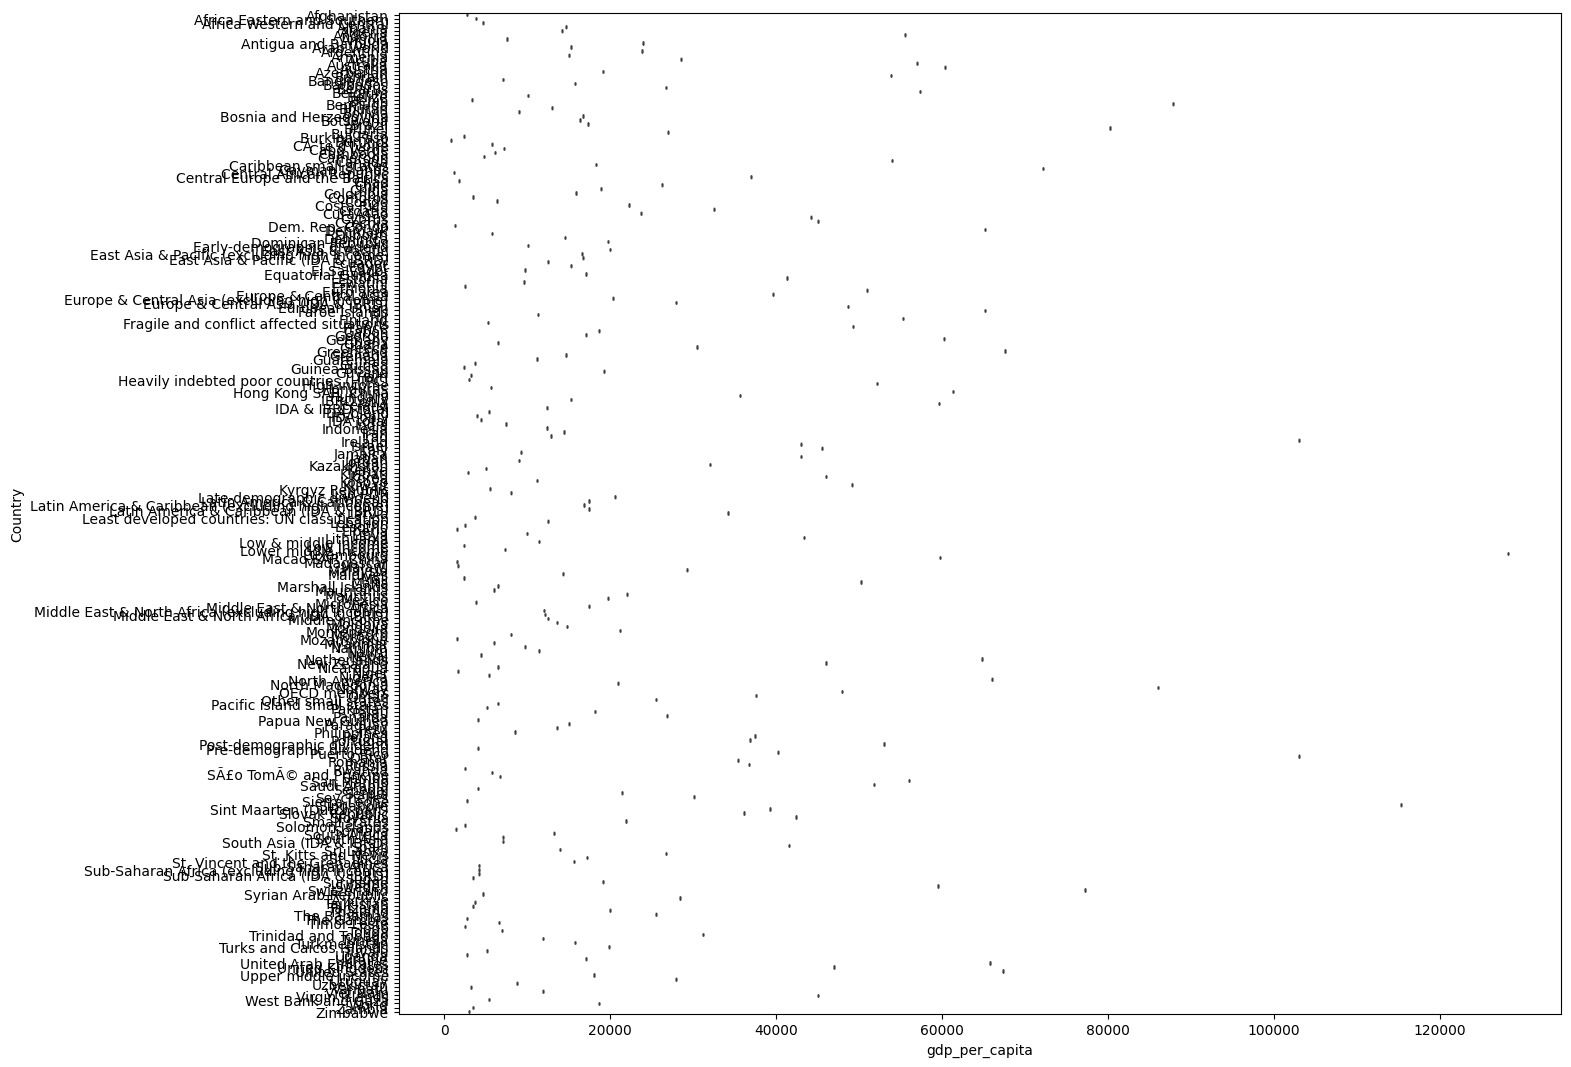

In [17]:
df_2020 = df_2020.dropna(subset=['gdp_per_capita'])
plt.figure(figsize=(15, 13)) 
sns.boxplot( x=df_2020["gdp_per_capita"], y=df_2020["Country"])

<Axes: xlabel='Country', ylabel='gdp_per_capita'>

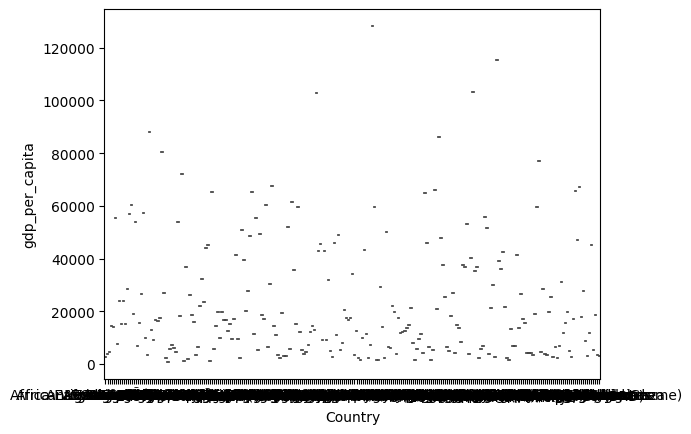

In [18]:
sns.violinplot(x=df_2020["Country"] , y=df_2020["gdp_per_capita"])

In [19]:
df_2020['gdp_per_capita'].median()

15309.23598817024

In [20]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]

In [21]:
gdp_decades

,Country,Year,gdp_per_capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012
...,...,...,...
8184,Zambia,1990,2425.111287
8188,Zimbabwe,2020,2987.269823
8198,Zimbabwe,2010,2572.769992
8208,Zimbabwe,2000,4071.022001


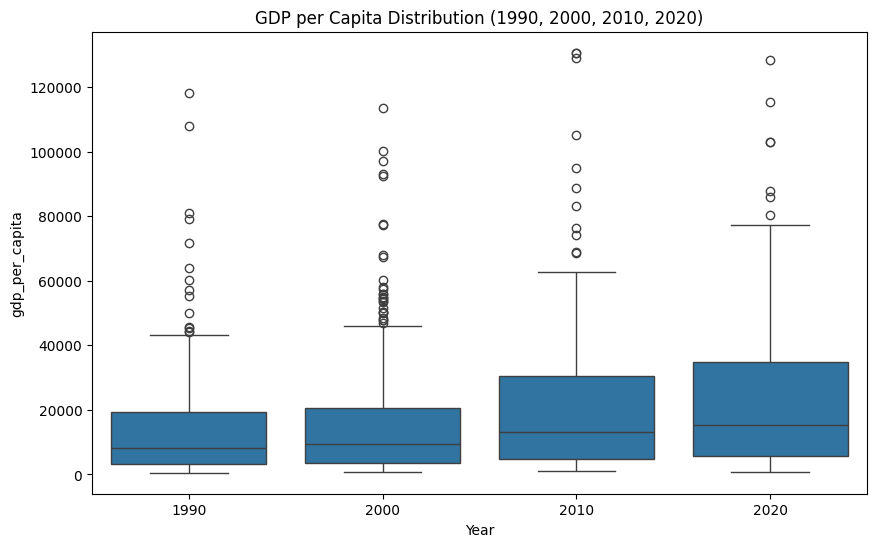

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='gdp_per_capita', data=gdp_decades)
plt.title('GDP per Capita Distribution (1990, 2000, 2010, 2020)')
plt.xlabel('Year')
plt.ylabel('gdp_per_capita')
plt.show()

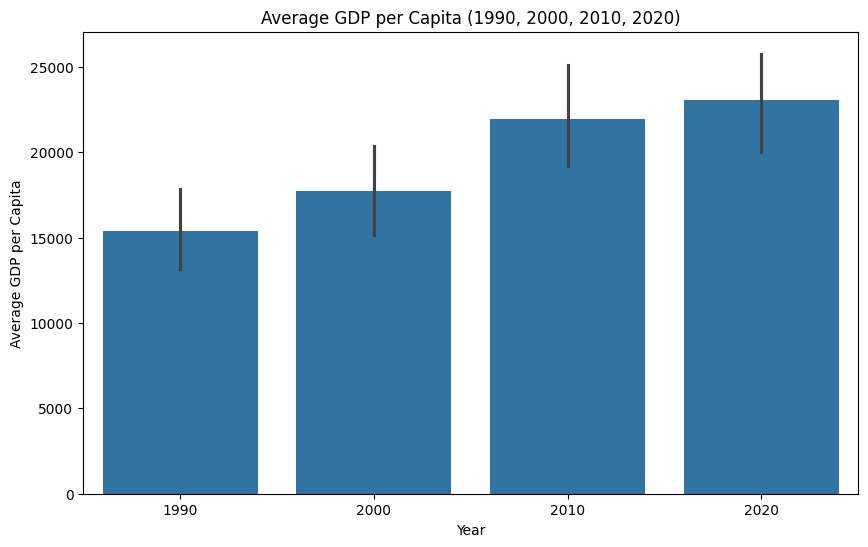

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='gdp_per_capita', data=gdp_decades)
plt.title('Average GDP per Capita (1990, 2000, 2010, 2020)')
plt.xlabel('Year')
plt.ylabel('Average GDP per Capita')
plt.show()

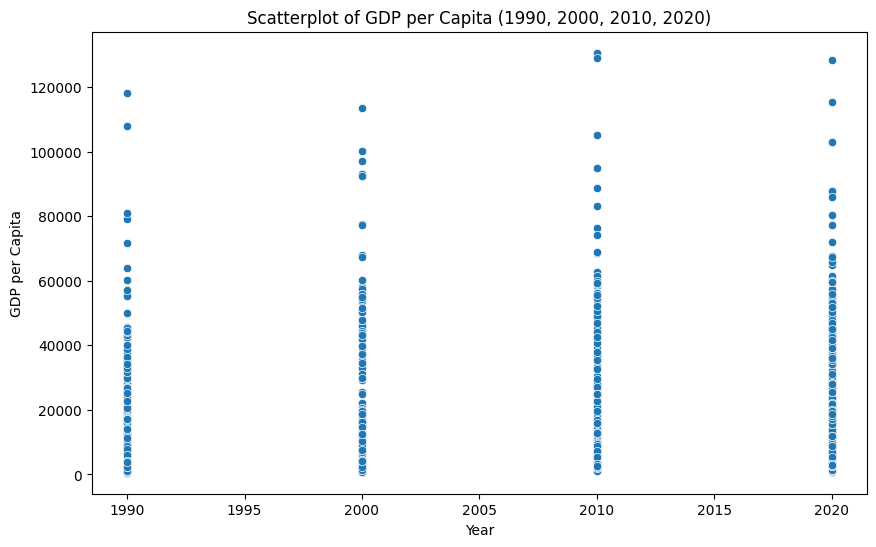

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='gdp_per_capita', data=gdp_decades)
plt.title('Scatterplot of GDP per Capita (1990, 2000, 2010, 2020)')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.show()

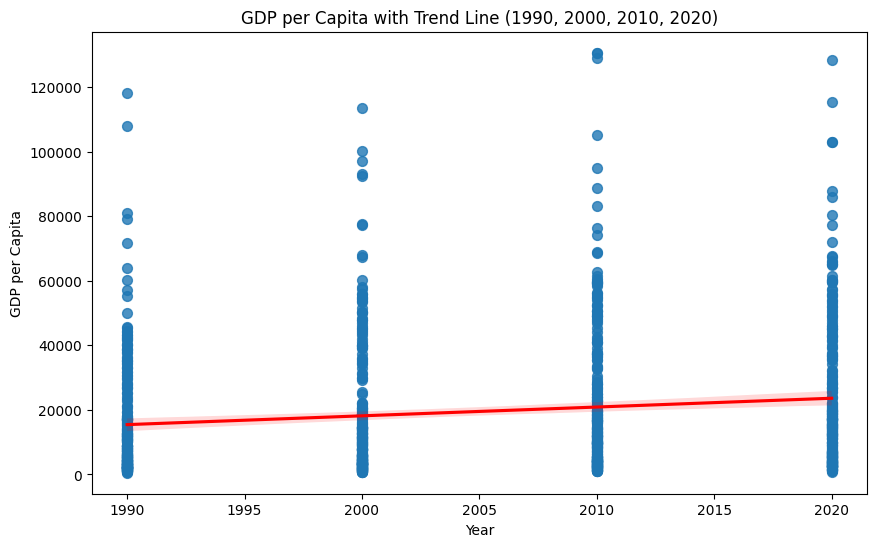

In [25]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Year', y='gdp_per_capita', data=gdp_decades, scatter_kws={'s': 50}, line_kws={"color": "red"})
plt.title('GDP per Capita with Trend Line (1990, 2000, 2010, 2020)')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.show()

In [26]:
high_gdp = gdp_df[gdp_df['gdp_per_capita'] > 100000].sort_values('Year').iloc[0]

In [27]:
high_gdp

Country           United Arab Emirates
Year                              1990
gdp_per_capita           108057.042464
Name: 7827, dtype: object

In [28]:
gdp_2020 = df_2020.loc[df_2020['gdp_per_capita'].idxmax()]
gdp_2020_low = df_2020.loc[df_2020['gdp_per_capita'].idxmin()]
country_2020_low = gdp_df[gdp_df['Country'] == gdp_2020_low['Country']]

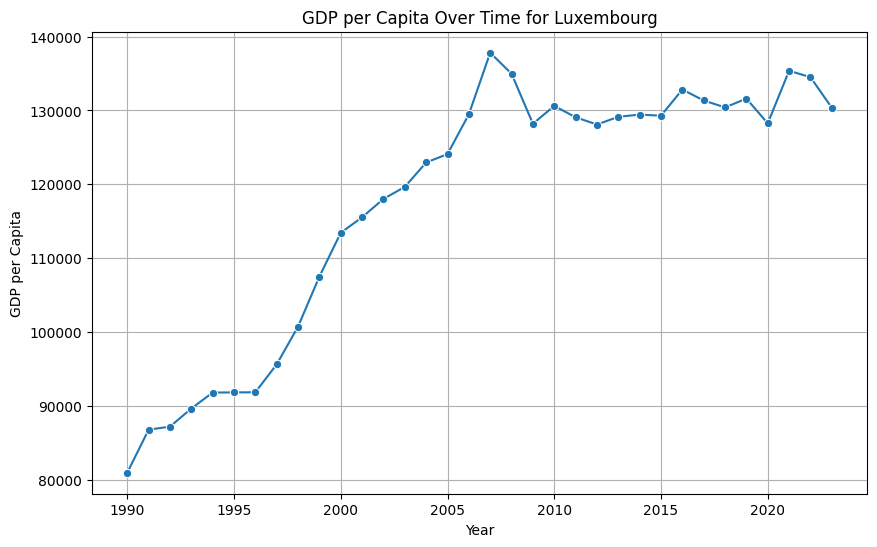

In [29]:
country_2020 = gdp_df[gdp_df['Country'] == gdp_2020['Country']]
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='gdp_per_capita', data=country_2020, marker='o')
plt.title(f"GDP per Capita Over Time for {gdp_2020['Country']}")
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.grid(True)

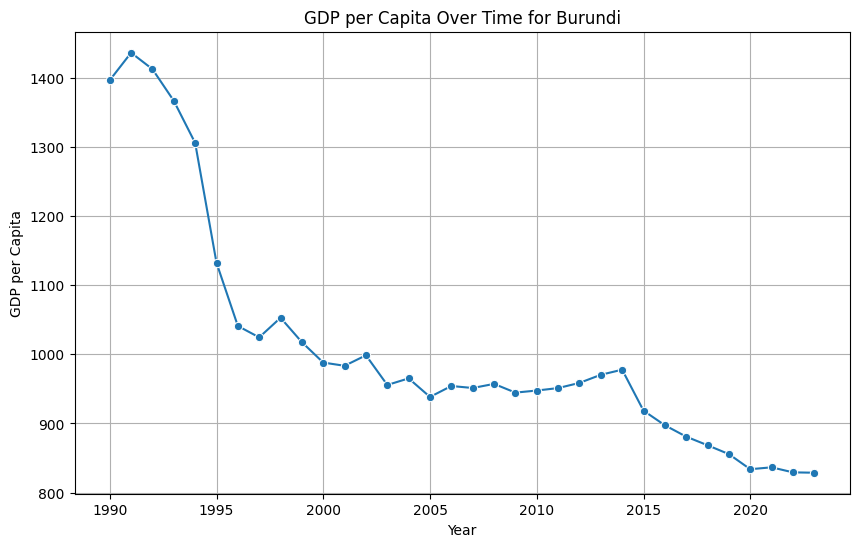

In [30]:

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='gdp_per_capita', data=country_2020_low, marker='o')
plt.title(f"GDP per Capita Over Time for {gdp_2020_low['Country']}")
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.grid(True)

In [31]:
internet_df = pd.read_csv('../data/internet_use.csv', on_bad_lines='warn')


In [32]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])

In [33]:
internet_df

,Country or Area,Year,Value
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [34]:
internet_df = internet_df.rename(columns = {'Country or Area': 'Country', 'Year': 'Year', 'Value': 'internet_users_pct'})

In [35]:
internet_df

,Country,Year,internet_users_pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [36]:
observations_internet = internet_df.groupby('Year').size()
observations_internet

Year
1990    226
1991     39
1992     50
1993     66
1994     92
1995    141
1996    177
1997    188
1998    195
1999    207
2000    210
2001    212
2002    214
2003    208
2004    210
2005    212
2006    212
2007    217
2008    214
2009    214
2010    209
2011    214
2012    209
2013    203
2014    204
2015    203
2016    206
2017    205
2018    174
2019    185
2020    186
2021    186
2022    184
2023     11
dtype: int64

In [37]:
first_non_zero_year = internet_df[internet_df['internet_users_pct'] > 0].iloc[0]

In [38]:
first_non_zero_year

Country               Afghanistan
Year                         2019
internet_users_pct           17.6
Name: 0, dtype: object

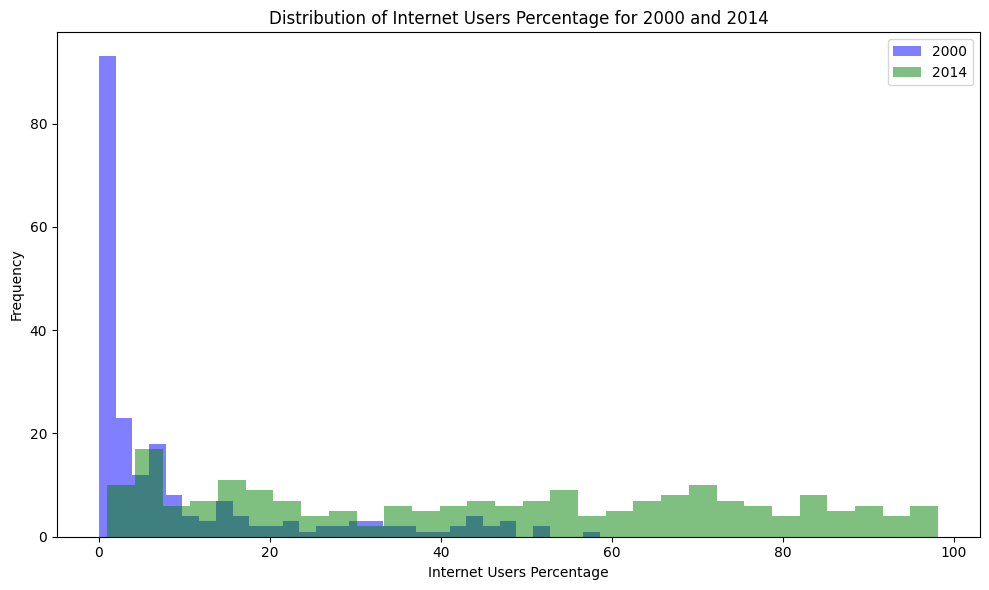

In [39]:
df_2000 = internet_df[internet_df['Year'] == 2000]
df_2014 = internet_df[internet_df['Year'] == 2014]

plt.figure(figsize=(10, 6))


plt.hist(df_2000['internet_users_pct'], bins=30, alpha=0.5, label='2000', color='blue')

plt.hist(df_2014['internet_users_pct'], bins=30, alpha=0.5, label='2014', color='green')

plt.xlabel('Internet Users Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Internet Users Percentage for 2000 and 2014')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [40]:
df_2014 = internet_df[internet_df['Year'] == 2014]

# Filter the countries where the internet users percentage is below 5%
countries_below_5_percent = df_2014[df_2014['internet_users_pct'] < 5]
countries_below_5_percent.count

<bound method DataFrame.count of                                Country  Year  internet_users_pct
873                            Burundi  2014             1.04239
1033          Central African Republic  2014             2.70000
1061                              Chad  2014             2.90000
1517  Democratic Republic of the Congo  2014             3.00000
1782                           Eritrea  2014             0.99000
2451                     Guinea-Bissau  2014             3.32000
3364                        Madagascar  2014             3.70000
4073                             Niger  2014             1.24868
5055                           Somalia  2014             1.63000
5116                       South Sudan  2014             2.60000>

In [41]:
gdp_and_internet_use = pd.merge(internet_df, gdp_df, on=['Country', 'Year'], how='outer')

In [42]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

In [43]:
top_3 = gdp_and_internet_use_2014.nlargest(3, 'internet_users_pct')['Country']

In [44]:
top_3

3944                        Iceland
2867    Falkland (Malvinas) Islands
824                         Bermuda
Name: Country, dtype: object

In [45]:
top_3_data = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(top_3)]


In [46]:
top_3_data

,Country,Year,internet_users_pct,gdp_per_capita
800,Bermuda,1990,0.0000,79109.890650
801,Bermuda,1991,NaN,75754.494259
802,Bermuda,1992,NaN,75160.932166
803,Bermuda,1993,NaN,76883.813796
804,Bermuda,1994,NaN,76850.912239
...,...,...,...,...
3949,Iceland,2019,99.5049,65065.905682
3950,Iceland,2020,99.5328,59575.190393
3951,Iceland,2021,99.6870,61685.835611
3952,Iceland,2022,99.8565,65563.920870


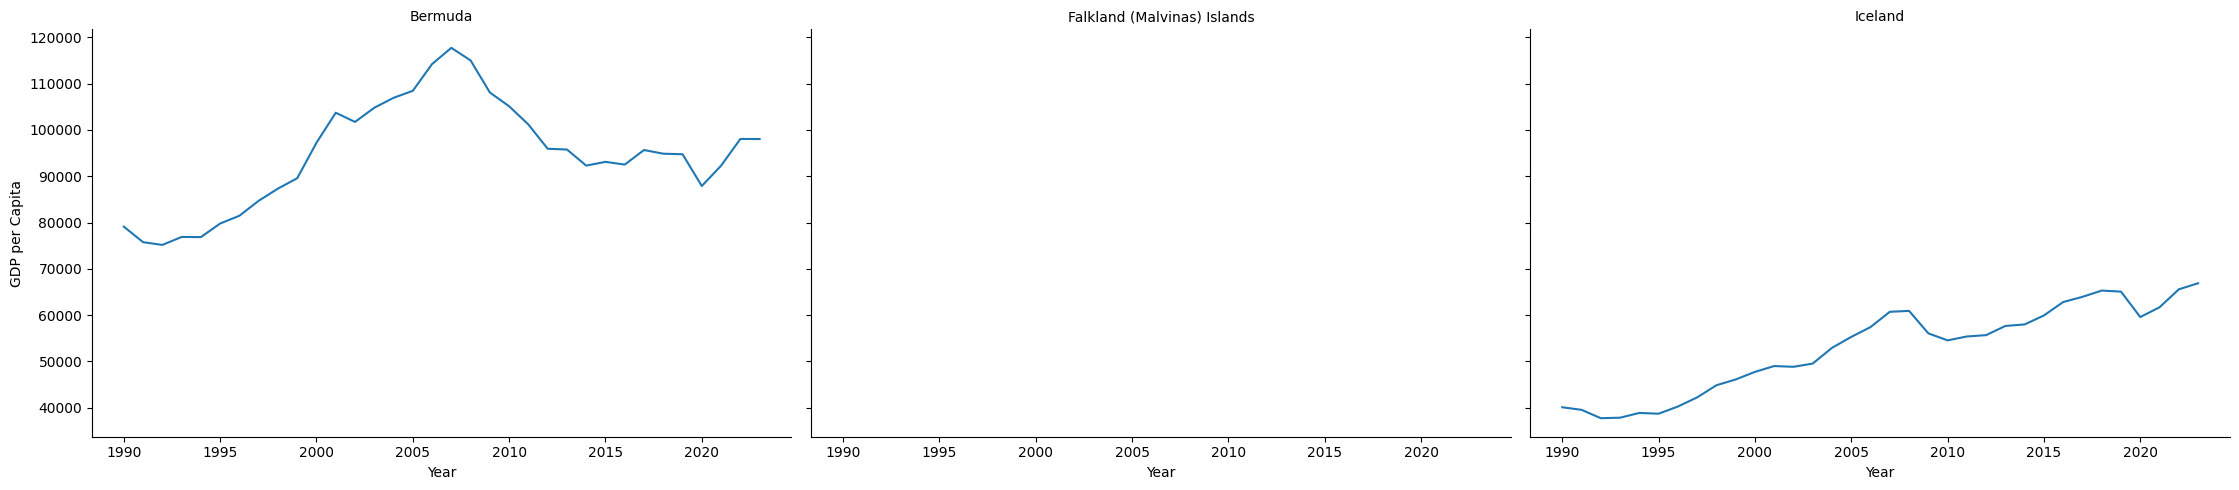

In [47]:
g = sns.FacetGrid(top_3_data, col="Country", height=5, aspect=1.5)
g.map(sns.lineplot, 'Year', 'gdp_per_capita')

g.set_axis_labels('Year', 'GDP per Capita')
g.set_titles("{col_name}")

plt.show()

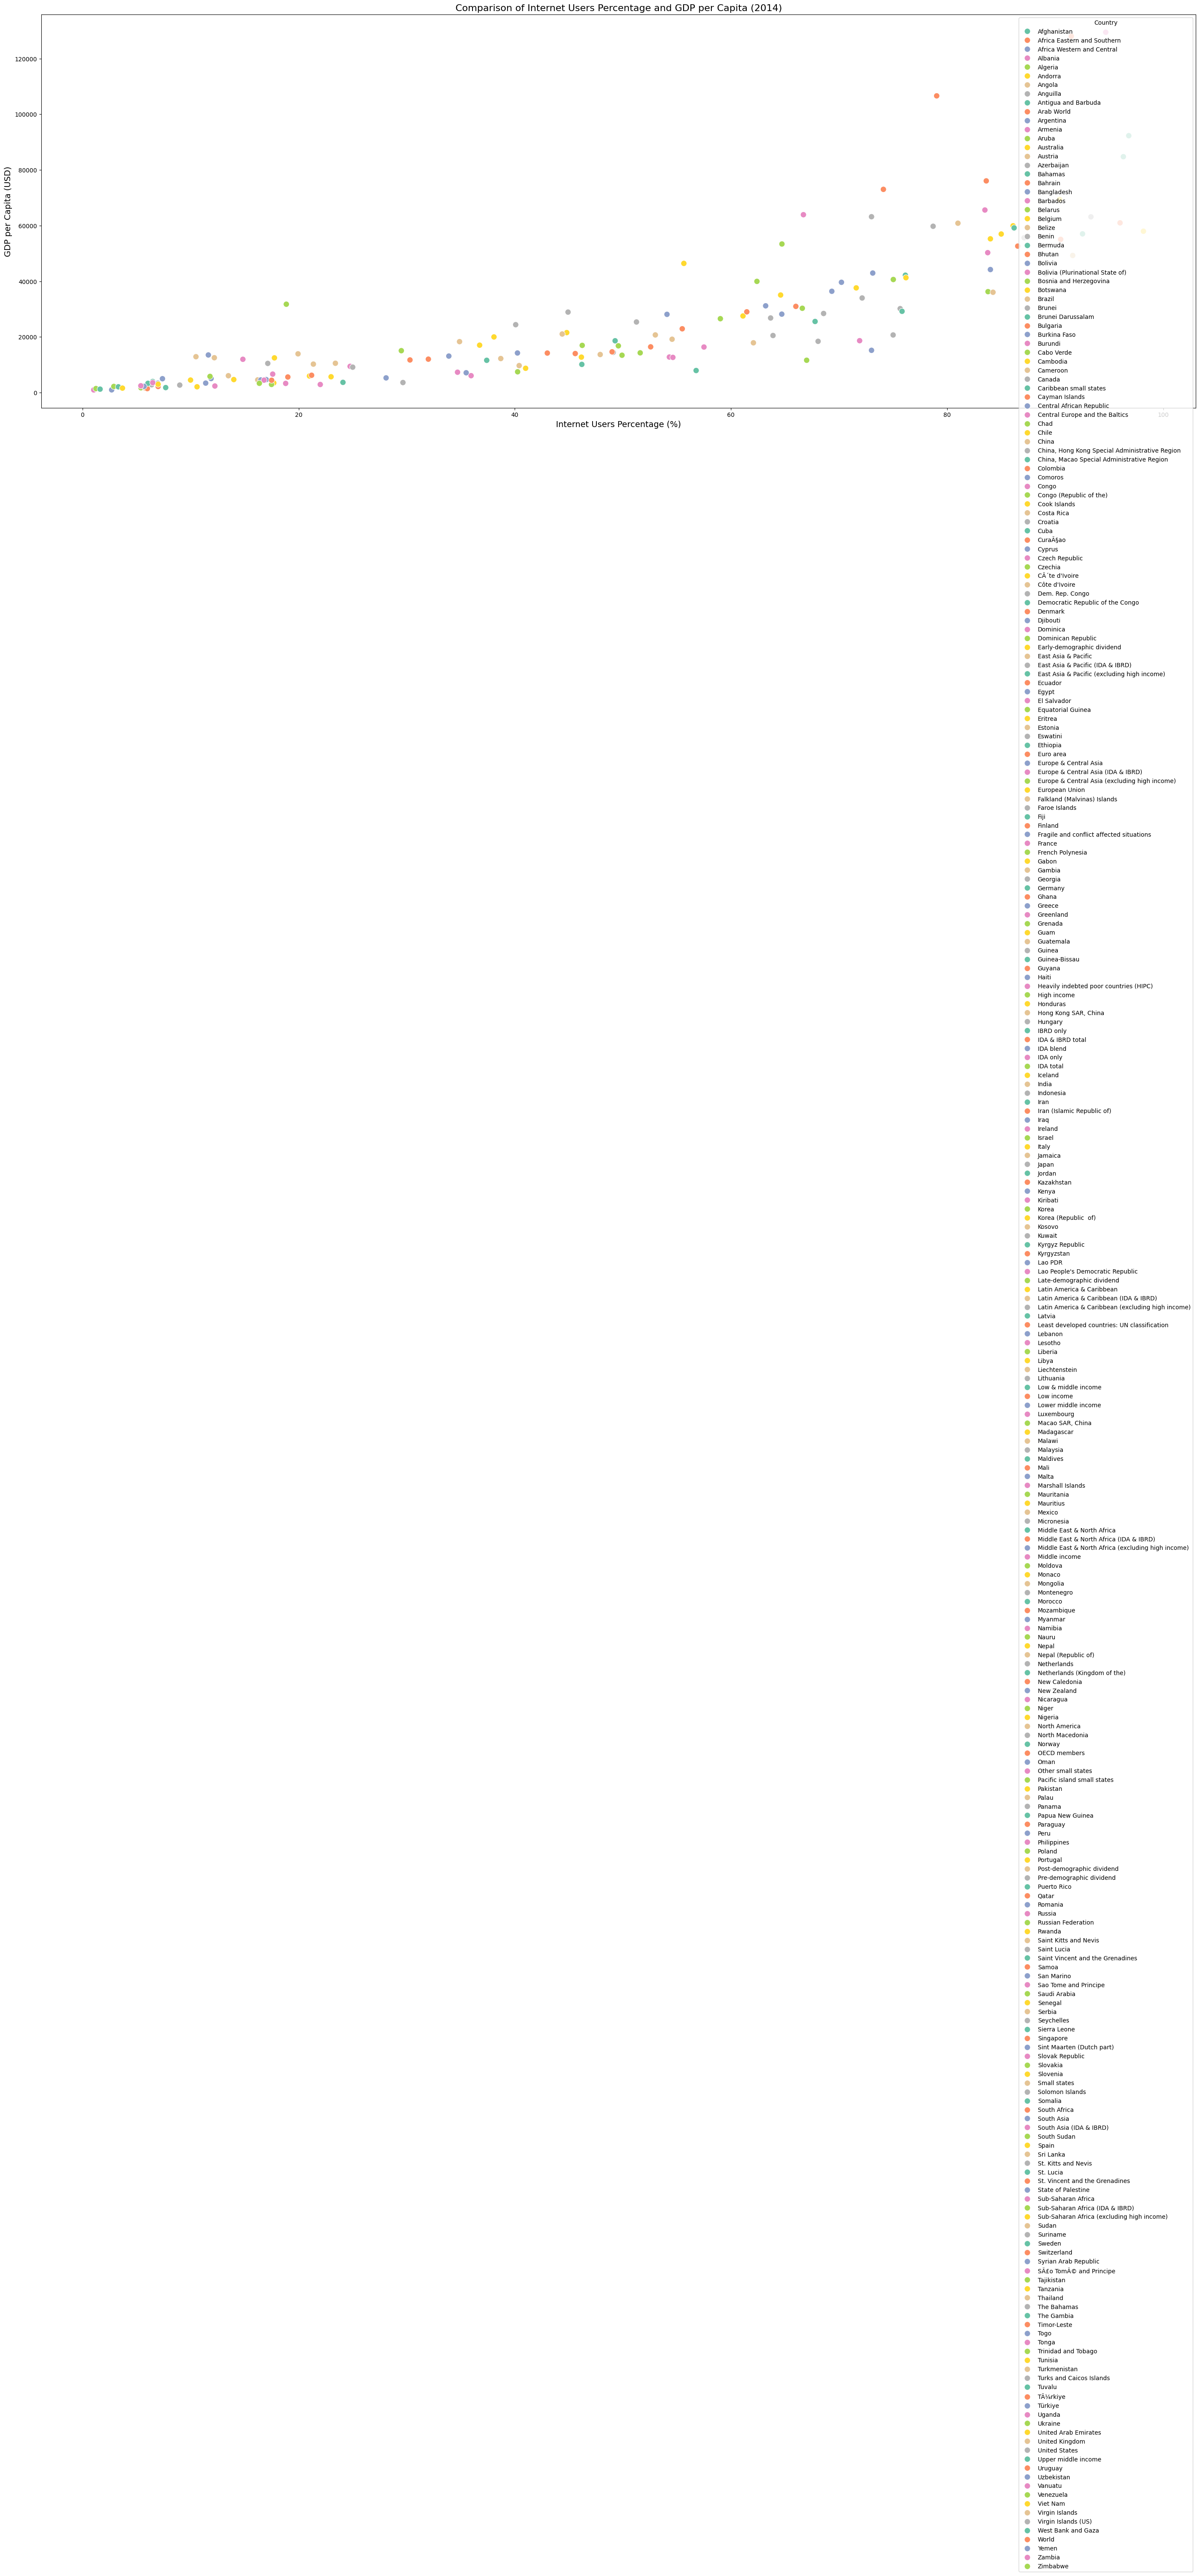

In [48]:
plt.figure (figsize=(35, 12))
sns.scatterplot(data=gdp_and_internet_use_2014, x='internet_users_pct', y='gdp_per_capita', hue='Country', palette='Set2', s=100)
plt.title('Comparison of Internet Users Percentage and GDP per Capita (2014)', fontsize=16)
plt.xlabel('Internet Users Percentage (%)', fontsize=14)
plt.ylabel('GDP per Capita (USD)', fontsize=14)
plt.show()

In [106]:
gdp_and_internet_use_2014.loc[:, 'GDP_group'] = pd.qcut(gdp_and_internet_use_2014['gdp_per_capita'], q=3, labels=["Low", "Medium", "High"])

In [108]:
gdp_and_internet_use_2014

,Country,Year,internet_users_pct,gdp_per_capita,GDP_group
15,Afghanistan,2014,7.0000,3017.942544,Low
49,Africa Eastern and Southern,2014,NaN,4052.851526,Low
83,Africa Western and Central,2014,NaN,4816.917355,Low
117,Albania,2014,54.3000,12788.747231,Medium
151,Algeria,2014,29.5000,15073.762940,Medium
...,...,...,...,...,...
9361,West Bank and Gaza,2014,NaN,5990.426615,Low
9395,World,2014,NaN,17307.606891,Medium
9424,Yemen,2014,22.5500,NaN,NaN
9455,Zambia,2014,6.5000,3585.577485,Low


In [118]:
median_internet_usage = gdp_and_internet_use_2014.groupby('GDP_group', observed = False)['internet_users_pct'].median()
print(median_internet_usage)

GDP_group
Low       11.6000
Medium    44.5945
High      75.9800
Name: internet_users_pct, dtype: float64
